<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.640190,55.851595,39.359059,-0.000463,143.850381,143.850846,-0.000465
1,0.0,1.0,35.326718,49.058444,83.400377,0.000716,177.786255,177.785650,0.000604
2,0.0,2.0,76.247866,79.150589,87.119897,-0.000195,252.518157,252.518380,-0.000222
3,0.0,3.0,38.969375,28.139892,97.244312,0.000432,174.354011,174.353750,0.000261
4,0.0,4.0,59.005679,34.712285,46.023475,0.000306,149.741745,149.741468,0.000277
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.195794,90.266436,76.776721,-0.000178,221.238773,221.238985,-0.000211
249996,999.0,246.0,39.269443,37.875803,65.359738,0.000127,152.505110,152.504832,0.000278
249997,999.0,247.0,82.556864,85.521081,93.498042,-0.000118,271.575869,271.576044,-0.000174
249998,999.0,248.0,41.613421,87.057451,92.164447,-0.000193,230.835126,230.835349,-0.000224


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.640190,55.851595,39.359059,-0.000463,143.850381,143.850846,-0.000465
1,0.0,1.0,35.326718,49.058444,83.400377,0.000716,177.786255,177.785650,0.000604
2,0.0,2.0,76.247866,79.150589,87.119897,-0.000195,252.518157,252.518380,-0.000222
3,0.0,3.0,38.969375,28.139892,97.244312,0.000432,174.354011,174.353750,0.000261
4,0.0,4.0,59.005679,34.712285,46.023475,0.000306,149.741745,149.741468,0.000277
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.195794,90.266436,76.776721,-0.000178,221.238773,221.238985,-0.000211
249996,999.0,246.0,39.269443,37.875803,65.359738,0.000127,152.505110,152.504832,0.000278
249997,999.0,247.0,82.556864,85.521081,93.498042,-0.000118,271.575869,271.576044,-0.000174
249998,999.0,248.0,41.613421,87.057451,92.164447,-0.000193,230.835126,230.835349,-0.000224


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.640190  55.851595  39.359059  ...  143.850381  143.850846 -0.000465
      1.0    35.326718  49.058444  83.400377  ...  177.786255  177.785650  0.000604
      2.0    76.247866  79.150589  87.119897  ...  252.518157  252.518380 -0.000222
      3.0    38.969375  28.139892  97.244312  ...  174.354011  174.353750  0.000261
      4.0    59.005679  34.712285  46.023475  ...  149.741745  149.741468  0.000277
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  44.195794  90.266436  76.776721  ...  221.238773  221.238985 -0.000211
      246.0  39.269443  37.875803  65.359738  ...  152.505110  152.504832  0.000278
      247.0  82.556864  85.521081  93.498042  ...  271.575869  271.576044 -0.000174
      248.0  41.613421  87.057451  92.164447  ...  230.835126  230.835349 -0.000224
      249.0  37.765406  45.675924  65.600864  ...  159.041683  159.042067 -0.000384

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.640190  55.851595  39.359059  ...  143.850381  143.850846 -0.000465
      1.0    35.326718  49.058444  83.400377  ...  177.786255  177.785650  0.000604
      2.0    76.247866  79.150589  87.119897  ...  252.518157  252.518380 -0.000222
      3.0    38.969375  28.139892  97.244312  ...  174.354011  174.353750  0.000261
      4.0    59.005679  34.712285  46.023475  ...  149.741745  149.741468  0.000277
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  44.195794  90.266436  76.776721  ...  221.238773  221.238985 -0.000211
      246.0  39.269443  37.875803  65.359738  ...  152.505110  152.504832  0.000278
      247.0  82.556864  85.521081  93.498042  ...  271.575869  271.576044 -0.000174
      248.0  41.613421  87.057451  92.164447  ...  230.835126  230.835349 -0.000224
      249.0  37.765406  45.675924  65.600864  ...  159.041683  159.042067 -0.000384

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.640190,55.851595,39.359059,-0.000463,143.850381,143.850846,-0.000465
1,0.0,1.0,35.326718,49.058444,83.400377,0.000716,177.786255,177.785650,0.000604
2,0.0,2.0,76.247866,79.150589,87.119897,-0.000195,252.518157,252.518380,-0.000222
3,0.0,3.0,38.969375,28.139892,97.244312,0.000432,174.354011,174.353750,0.000261
4,0.0,4.0,59.005679,34.712285,46.023475,0.000306,149.741745,149.741468,0.000277
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.195794,90.266436,76.776721,-0.000178,221.238773,221.238985,-0.000211
249996,999.0,246.0,39.269443,37.875803,65.359738,0.000127,152.505110,152.504832,0.000278
249997,999.0,247.0,82.556864,85.521081,93.498042,-0.000118,271.575869,271.576044,-0.000174
249998,999.0,248.0,41.613421,87.057451,92.164447,-0.000193,230.835126,230.835349,-0.000224


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.640190  55.851595  39.359059  ...  143.850381  143.850846 -0.000465
      1.0    35.326718  49.058444  83.400377  ...  177.786255  177.785650  0.000604
      2.0    76.247866  79.150589  87.119897  ...  252.518157  252.518380 -0.000222
      3.0    38.969375  28.139892  97.244312  ...  174.354011  174.353750  0.000261
      4.0    59.005679  34.712285  46.023475  ...  149.741745  149.741468  0.000277
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  44.195794  90.266436  76.776721  ...  221.238773  221.238985 -0.000211
      246.0  39.269443  37.875803  65.359738  ...  152.505110  152.504832  0.000278
      247.0  82.556864  85.521081  93.498042  ...  271.575869  271.576044 -0.000174
      248.0  41.613421  87.057451  92.164447  ...  230.835126  230.835349 -0.000224
      249.0  37.765406  45.675924  65.600864  ...  159.041683  159.042067 -0.000384

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

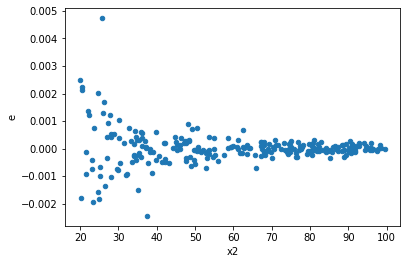

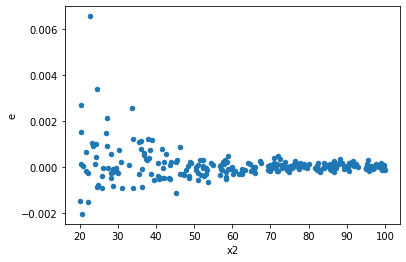

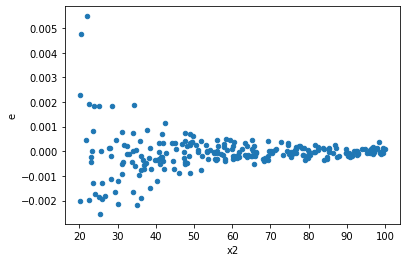

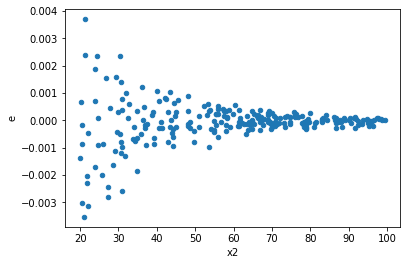

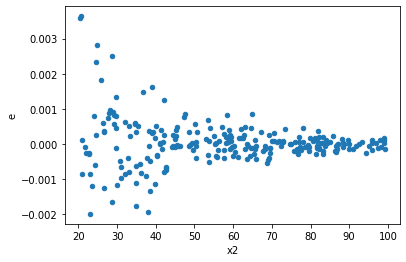

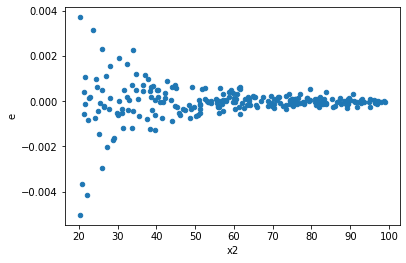

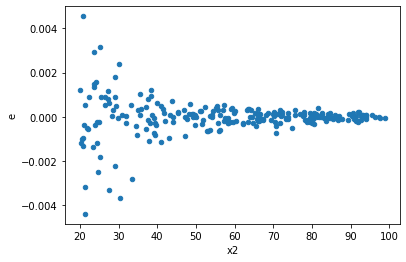

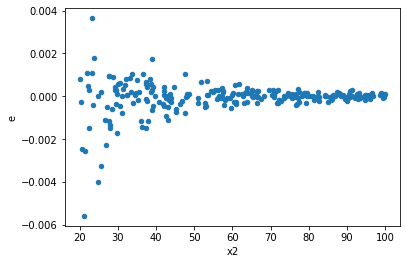

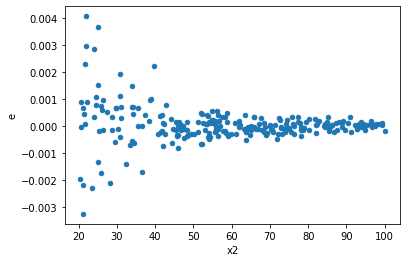

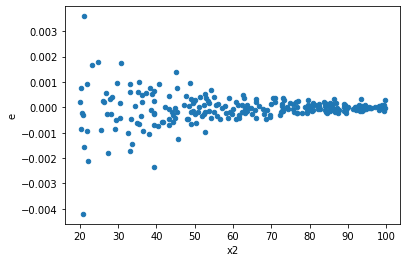

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,1.9649458648399674e-06,9.166905502915329e-05,2.0468186092082995e-08,9.548859898870134e-07,0.02143521457939171,1.9580494698586324e-54,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,1.674631075778535e-06,0.00010530608927479921,1.7444073706026407e-08,1.0969384299458251e-06,0.015902509411478933,1.687749846604278e-60,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,2.8219465299545237e-06,0.00014428911883700927,2.9395276353692955e-08,1.50301165455218e-06,0.01955758377831823,2.7341626933643607e-56,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,2.000118992352063e-06,0.00013189086450025864,2.0834572837000656e-08,1.373863171877694e-06,0.015164954752026368,1.8071162831702318e-61,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,2.8991690724084013e-06,9.709307460692173e-05,3.0199677837587516e-08,1.0113861938221013e-06,0.029859689624060177,8.607910964421849e-48,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,2.1523743134725375e-06,0.00014167625795469748,2.2420565765338932e-08,1.4757943536947655e-06,0.01519220188721234,1.9664794064713784e-61,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,2.848907254097341e-06,0.00016047858440503552,2.9676117230180632e-08,1.6716519208857867e-06,0.01775256969432706,2.9533766507412044e-58,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,2.209771064692451e-06,0.00012987380888790283,2.3018448590546367e-08,1.3528521759156545e-06,0.017014755196713735,4.0375633266630335e-59,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,2.416847587921007e-06,0.00010773428063842547,2.5175495707510492e-08,1.1222320899835987e-06,0.022433412778170004,1.6227375400927013e-53,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64